## Synchrotron and Synchrotron Self Compton

In [1]:
import sys
sys.path.append("../")
import numpy as np
import astropy.units as u
import astropy.constants as const
from astropy.coordinates import Distance
from agnpy.emission_regions import Blob
from agnpy.synchrotron import Synchrotron
from agnpy.compton import SynchrotronSelfCompton
import matplotlib.pyplot as plt

In [2]:
# matplotlib adjustments and axes labels
plt.rc("figure", figsize=(7.5, 5.5))
plt.rc("font", size=12)
plt.rc("axes", grid=True)
plt.rc("grid", ls=":")
sed_x_label = r"$\nu\,/\,Hz$"
sed_y_label = r"$\nu F_{\nu}\,/\,(\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1})$"

In [3]:
spectrum_norm = 1e48 * u.Unit("erg") 
spectrum_dict = {
    "type": "PowerLaw", 
    "parameters": {
        "p": 2.8, 
        "gamma_min": 1e2, 
        "gamma_max": 1e7
    }
}
R_b = 1e16 * u.cm
B = 1 * u.G
z = Distance(1e27, unit=u.cm).z
delta_D = 10
Gamma = 10
blob = Blob(R_b, z, delta_D, Gamma, B, spectrum_norm, spectrum_dict)
print(f"total particle number: {blob.N_e_tot:.2e}")
print(f"total energy: {blob.W_e:.2e}")

normalising power-law to total energy density u_e: 2.39e-01 erg / cm3
total particle number: 5.43e+51
total energy: 1.00e+48 erg


In [4]:
print(blob)

* spherical emission region
 - R_b (radius of the blob): 1.00e+16 cm
 - V_b (volume of the blob): 4.19e+48 cm3
 - z (source redshift): 0.07
 - d_L (source luminosity distance):1.00e+27 cm
 - delta_D (blob Doppler factor): 1.00e+01
 - Gamma (blob Lorentz factor): 1.00e+01
 - Beta (blob relativistic velocity): 9.95e-01
 - mu_s (cosine of the jet viewing angle): 9.95e-01
 - B (magnetic field tangled to the jet): 1.00e+00 G
 - electron spectra:
  |- normalisation: 1.00e+48 erg
  |- spectral function: PowerLaw
  |- gamma_min (minimum Lorentz factor): 1.00e+02
  '- gamma_max (maximum Lorentz factor): 1.00e+07


In [5]:
blob.P_jet_e

<Quantity 4.47534633e+44 erg / s>

In [6]:
blob.P_jet_B

<Quantity 7.45724324e+43 erg / s>

In [7]:
synch = Synchrotron(blob)

In [8]:
nu_syn = np.logspace(8, 23) * u.Hz

In [9]:
%%timeit 
synch.sed_flux(nu_syn)

2.16 ms ± 264 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
%%timeit 
synch.sed_flux(nu_syn, SSA=True)

3.75 ms ± 352 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


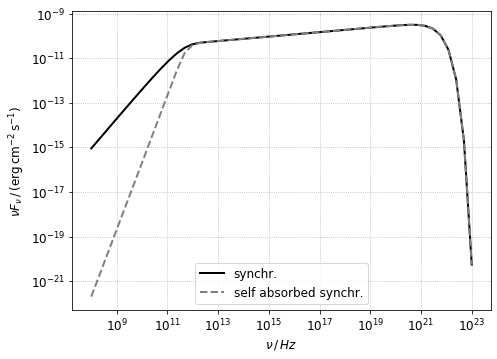

In [11]:
plt.loglog(nu_syn, synch.sed_flux(nu_syn), color="k", lw=2, label="synchr.")
plt.loglog(nu_syn, synch.sed_flux(nu_syn, SSA=True), lw=2, ls="--", color="gray", label="self absorbed synchr.")
plt.xlabel(sed_x_label)
plt.ylabel(sed_y_label)
plt.legend()
plt.show()

In [12]:
ssc = SynchrotronSelfCompton(blob, synch)

In [13]:
nu_ssc = np.logspace(15, 30) * u.Hz

In [14]:
%%timeit
ssc.sed_flux(nu_ssc)

441 ms ± 148 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


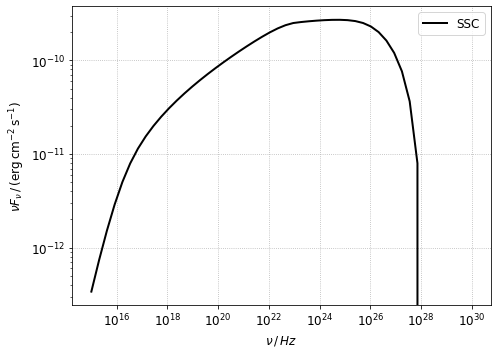

In [15]:
plt.loglog(nu_ssc, ssc.sed_flux(nu_ssc), lw=2, color="k", label="SSC")
plt.xlabel(sed_x_label)
plt.ylabel(sed_y_label)
plt.legend()
plt.show()

### reproduce Figure 7.4 of Dermer and Menon (2009)
<img src="figures/figure_7_4_dermer_2009.png" style="float: left;" width="500"/>

In [16]:
spectrum_dict["parameters"]["gamma_max"] = 1e5
blob2 = Blob(R_b, z, delta_D, Gamma, B, spectrum_norm, spectrum_dict)
synch2 = Synchrotron(blob2)
ssc2 = SynchrotronSelfCompton(blob2, synch)

normalising power-law to total energy density u_e: 2.39e-01 erg / cm3


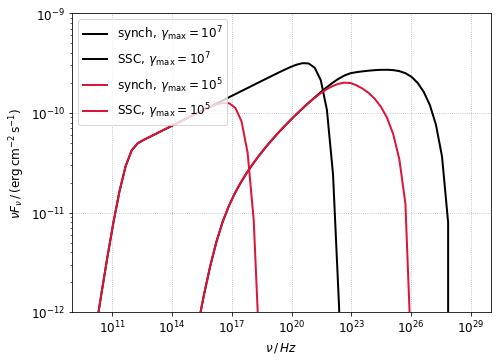

In [17]:
plt.loglog(nu_syn, synch.sed_flux(nu_syn), lw=2, color="k", label=r"${\rm synch},\,\gamma_{\rm max}=10^7$")
plt.loglog(nu_ssc, ssc.sed_flux(nu_ssc), lw=2, color="k", label=r"${\rm SSC},\,\gamma_{\rm max}=10^7$")
plt.loglog(nu_syn, synch2.sed_flux(nu_syn), lw=2, color="crimson", label=r"${\rm synch},\,\gamma_{\rm max}=10^5$")
plt.loglog(nu_ssc, ssc2.sed_flux(nu_ssc), lw=2, color="crimson", label=r"${\rm SSC},\,\gamma_{\rm max}=10^5$")
plt.xlabel(sed_x_label)
plt.ylabel(sed_y_label)
plt.xlim([1e9, 1e30])
plt.ylim([1e-12, 1e-9])
plt.legend(loc=2)
plt.show()